# MA934 - Week 9 (assessed!) Problem Sheet

## Deadline: 17:00 (UK time) on Friday 8 December 

For this assignment, you must create a new Jupyter notebook called MA934_Week9_UniID.ipynb to contain the implementations that you write. This should also be exported as a .pdf file such that all execution output (from data to plots) is visible as produced on your own machine. You can separate out individual tasks if you prefer, but the full submission should be made as a single .zip via [our website](https://warwick.ac.uk/fac/sci/mathsys/courses/msc/ma934/resources/assessedwork/ma934declaration). The platform will not allow you to upload more than one file.

A few tips:
- please make sure to debug intermediate outputs as you code along. You are welcome to design smaller test cases and toy problems to verify your work (even if they are not part of the final submission).
- consider possible forms of input or arguments and make sure your solution can cope with *interesting* cases.
- do not forget to comment your code and use Markdown cells to explain what you are doing. A perfectly functional solution with no information about the thought process will not receive more than a subset of the points (~$70\%$ depending on the difficulty of the problem and how transparent the algorithm flow is). 
- generally getting used to writing tidy solutions is good practice. Feel free to use [online resources](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet) for editing guidance.

The problems below provide an opportunity to explore the gradient descent and its stochastic counterpart, putting the previously built theoretical foundation to good use. 

## Task 1 - Gradient descent [60 marks]

Consider the following optimisation problem in $\mathbb{R}^n$

$$\min_{\substack{\mathbf{x} \in \mathbb{R}^n} } f(\mathbf{x})$$

where $f(\mathbf{x})$ is the quartic function defined as

$$ f(\mathbf{x}) = \frac{1}{4} \left( (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)\right)^2 $$

with 

$$ A = \left( 
\begin{array}{ccccc} 
\frac{\lambda+1}{2} & \frac{\lambda - 1}{2} & 0 &\ldots & 0\\ 
\frac{\lambda-1}{2} & \frac{\lambda + 1}{2} & 0 &\ldots & 0\\
0 & 0 & 1 &\ldots & 0\\ 
\vdots & \vdots & \vdots &\ddots & \vdots\\ 
0 & 0 & 0 &\ldots & 1
\end{array}
\right),
$$
$$
\mathbf{x}_* = \left( \begin{array}{c}
\sqrt{2}\\
\sqrt{3}\\
1\\
\vdots\\
1
\end{array}
\right)
$$
and $\lambda > 0$ is a parameter that controls the shape of the objective function. A reasonable range of values for $\lambda$ is $\frac{1}{10} \leq \lambda \leq 10$.

* Write down the solution of this problem. [5 marks]
* Write down the eigenvalues of the matrix $A$. [5 marks]
* Derive a formula for the gradient, $\nabla f(\mathbf{x})$, at any point in $\mathbb{R}^n$. [5 marks]
* Use your results to implement the gradient descent algorithm in Python. Use your algorithm to numerically solve the above problem with $n=2$ and $\lambda=2$. A good initial point is $\mathbf{x}_0 = 5\,\mathbf{x}_*$.  A good tolerance is $\varepsilon = 10\, \epsilon_m$. **Note:** You will need to write your own *Golden Section Search* code as part of this task, which is a small subproblem in itself. Make sure you verify your implementation with smaller datasets before deploying it within the context of the larger problem. [25 marks]
* Plot how the distance from the minimum decreases as s function of the number of iterations and empirically determine the convergence rate of the algorithm. [10 marks]
* Determine empirically how the number of steps required to solve the problem varies with $\lambda$ when $n=3$. [10 marks]

# 1a Write down the solution of this problem

The solution is definitely $\overline x = \overline x^*$ (where bar denotes that it is a vector);
We can understand it because at $ \overline x^*$ $f(\overline x)$ takes the value of zero, 
while in other $\overline x$ f will take values greater than zero - and it is because matrix A is non-degenerate, since its eigenvalues are $\lambda > 0 $ for one time and $1$ for $n-1$ times, and so in the neighmourhood of $\overline x^*$ looks like a square of paraboloid - so it takes values greater than zero.

But we can also find the minimum by writing down the gradient of $f(\overline x)$ 
and setting it to zero. Below we will derive that the gradient of $f(\overline x)$ is $\nabla f(\overline x) = \left( ( \overline x - \overline x^*)^T A ( \overline x - \overline x^*) \right) A( \overline x - \overline x^*)$, so due to non-degeneracy of A making the gradient being equal to zero gives as a system of equations
$$
\left\{ \begin{aligned}
(\lambda+1)(x_1-x_1^*) + (\lambda-1)(x_2-x_2^*)=0,\\
(\lambda-1)(x_1-x_1^*) + (\lambda+1)(x_2-x_2^*)=0,\\
(x_i-x_i^*)=0, i=2,\dots,n.\\
\end{aligned} \right\}
$$

Substract the first equation from the second and get
$$
\left\{ \begin{aligned}
(\lambda+1)(x_1-x_1^*) + (\lambda-1)(x_2-x_2^*)=0,\\
-2(x_1-x_1^*) + 2(x_2-x_2^*)=0,\\
(x_i-x_i^*)=0, i=2,\dots,n.\\
\end{aligned} \right\}
$$
Hence
$$
\left\{ \begin{aligned}
2\lambda(x_1-x_1^*)=0,\\
(x_1-x_1^*)=(x_2-x_2^*),\\
(x_i-x_i^*)=0, i=2,\dots,n.\\
\end{aligned} \right\}
$$
And so again $x_i=x_i^*, i=1,2,\dots,n$, because $\frac{1}{10} \leq \lambda \leq 10$ and hence $\lambda$ is not zero.

# 1b Write down the eigenvalues of matrix A


To do this, we need to compute the determinant of $A-\mu E$, and solve for $\mu$.
$$ A-\mu E = \left( 
\begin{array}{ccccc} 
\frac{\lambda+1}{2} -\mu & \frac{\lambda - 1}{2} & 0 &\ldots & 0\\ 
\frac{\lambda-1}{2} & \frac{\lambda + 1}{2} -\mu & 0 &\ldots & 0\\
0 & 0 & 1 &\ldots & 0\\ 
\vdots & \vdots & \vdots &\ddots & \vdots\\ 
0 & 0 & 0 &\ldots & 1
\end{array}
\right),
$$

So $det(A-\mu E) =\left( (\frac{\lambda +1}{2}-\mu)^2 - (\frac{\lambda -1}{2})^2\right) (1-\mu)^{n-2}=
(\frac{\lambda +1}{2}-\mu - \frac{\lambda -1}{2})(\frac{\lambda +1}{2}-\mu + \frac{\lambda -1}{2})(1-\mu)^{n-2}=(1-\mu)^{n-1}(\lambda -\mu)$

So eigenvalues are $\mu=1$ for $n-1$ times and $\mu=\lambda$ for one time.

# 1c Derive a formula for the gradient, $\nabla f(\mathbf{x})$, at any point in $\mathbb{R}^n$

We need to use the fact that $\nabla (\overline x^T A \overline x)=2Ax$, and from this 
$\nabla \left( (\overline x-\overline x^*)^T A \overline x \right) =2A(\overline x-\overline x^*)$,
and so due to chain rule for derivatives 
$\nabla f(\overline x)=\frac{1}{4}\cdot 2 \left( ( \overline x - \overline x^*)^T A ( \overline x - \overline x^*) \right) \cdot 2 \cdot A( \overline x - \overline x^*) =
\left( ( \overline x - \overline x^*)^T A ( \overline x - \overline x^*) \right)  A( \overline x - \overline x^*)$

But we also can derive the gradient directly:
$f(\overline x)=\frac{1}{4} \left( ( \overline x - \overline x^*)^T A ( \overline x - \overline x^*) \right)^2 = \frac{1}{4} \left( \frac{\lambda+1}{2} (x_1-x_1^*)^2 +(\lambda-1)(x_1-x_1^*)(x_2-x_2^*) +\frac{\lambda +1}{2} (x_2-x_2^*)^2 + (x_3-x_3^*)^2 + \cdots + (x_n-x_n^*)^2\right)^2$

So $\frac{df}{dx_1}= \frac{1}{4} \left( ( \overline x - \overline x^*)^T A ( \overline x - \overline x^*) \right) \left( (\lambda+1)(x_1-x_1^*) + (\lambda-1)(x_2-x_2^*) \right) $

$\frac{df}{dx_2}= \frac{1}{4} \left( ( \overline x - \overline x^*)^T A ( \overline x - \overline x^*) \right) \left( (\lambda-1)(x_1-x_1^*) + (\lambda+1)(x_2-x_2^*) \right) $

$\frac{df}{dx_1}= \frac{1}{4} \left( ( \overline x - \overline x^*)^T A ( \overline x - \overline x^*) \right) 2 (x_i-x_i^*); 2 \leq i \leq n. $

This gives us the same answer.

# 1d Implement gradient descent algorithm in Python

In [206]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,x_star,n,lambd):
    if (n<2):
        raise Exception("n should be not less than 2!")
    otv=0
    otv+=0.5*(lambd+1)*(x[0]-x_star[0])**2
    otv+=(lambd-1)*(x[0]-x_star[0])*(x[1]-x_star[1])
    otv+=0.5*(lambd+1)*(x[1]-x_star[1])**2
    for i in range(3,n):
        otv+=(x[i]-x_star[i])**2
    return 0.25*otv**2
    
def get_gradient(x,x_star,n,lambd): 
    if(n<2):
        raise Exception("n should be not less than 2!")
    mas=np.zeros(n)
    koef=0.5*np.sqrt(f(x,x_star,n,lambd))
    #koef=1
    mas[0]=koef*((lambd+1)*(x[0]-x_star[0]) + (lambd-1)*(x[1]-x_star[1]))
    mas[1]=koef*((lambd-1)*(x[0]-x_star[0]) + (lambd+1)*(x[1]-x_star[1]))
    for i in range(3,n):
        mas[i]=koef*2*(x[i-1]-x_star[i-1])
    #print("x=",x,"koef=",koef,"grad=",mas/koef)
    return mas

n=2
x_star=np.ones(n)
x_star[0]=np.sqrt(2)
x_star[1]=np.sqrt(3)

x=5*x_star
lambd=2

mas_errors_naive=[]
for k in range(10000):
    tek_grad=get_gradient(x,x_star,n,lambd)
    u=tek_grad/np.linalg.norm(tek_grad)
    tau_k=-1/(k+1)
    #print("k=",k,"tau_k=",tau_k,"u=",u)
    x=x+tau_k*u
    mas_errors_naive.append(np.sqrt(sum((x-x_star)**2)))
print("k=",k, "x=",x,"x_star=",x_star, "l2_error=", np.sqrt(sum((x-x_star)**2)))

k= 9999 x= [1.41426511 1.73210235] x_star= [1.41421356 1.73205081] l2_error= 7.289392077170675e-05


In [52]:
plt.loglog(np.arange(10000),mas_errors_naive,label='l2_error')
plt.legend()
plt.title(r'Decrease of error in naive gradient descent with $\tau_k=\frac{1}{k+1}$')
plt.xlabel('k, number of step')
plt.ylabel(r'$||x-x^*||$')
plt.show()

We see that the gradient descent with chosen scenario of decrease for learning rate converges to the error of $10^{-5}$ in 10000 steps! But it is an easy version of gradient descent for neural networks and this does not guarantee rate of convergence of $\left( \frac{\sqrt{5}-1}{2}\right)^n$.

So recall that the true gradient descent tells not to take $\tau_k=\frac{1}{k+1}$, 
but $\tau_k=\min_{\tau} f(\overline x+\tau*\overline u)$, where $\overline u$ is the gradient of $f$.
This one-dimensional optimization is done via golden section search.

Lets implements golden section search for one-dimensional function $g(tau)$.

In [169]:


def g_simple(tau):
    #print("Hello from g")
    return np.exp(tau)/tau #min is in tau=1

# def g_hard(tau,u,x,x_star,n,lambd): #g(tau)=f(x+tau*u)
#     return f(x+tau*u,x_star,n,lambd)

def get_min_by_golden_section_search_1D(a,c,eps_tol,g,*args,**kwargs): #*args,**kwargs=x,u,x_star,n,lambd
    #print("args=",args,"c-a=",c-a)
    if ((c-a)<eps_tol):
        return [(a,c)] #return the sequence of bracketing intervals
    w=(np.sqrt(5)-1)/2
    b=c-w*(c-a)
    tau=a-b+c
    #tau = b + (1 − w) (c − b)
    ga=g(a,*args,**kwargs)
    gb=g(b,*args,**kwargs)
    gtau=g(tau,*args,**kwargs)
    gc=g(c,*args,**kwargs)
    #print("a,b,tau,c:",a,b,tau,c)
    #print("g_a,g_b,g_tau,g_c:",ga,gb,gtau,gc)
    if (gb<gtau):
        return [(a,c)]+get_min_by_golden_section_search_1D(a,tau,eps_tol,g,*args,**kwargs)
    else:
        return [(a,c)]+get_min_by_golden_section_search_1D(b,c,eps_tol,g,*args,**kwargs)
    

#lets check that for g_simple(tau)=np.exp(tau)/tau our golden search finds the minimum tau=1
mas_bracketing_intervals=get_min_by_golden_section_search_1D(0.1,2,1e-7,g_simple)
found_minimum=(mas_bracketing_intervals[-1][0]+mas_bracketing_intervals[-1][1])/2
print("We have found local mimimum at", found_minimum)
mas_length_of_bracketing_intervals=[(el[1]-el[0]) for el in mas_bracketing_intervals] 

mas_iteration_numbers=1+np.arange(len(mas_length_of_bracketing_intervals))
plt.plot(mas_iteration_numbers,[np.log10(el) for el in mas_length_of_bracketing_intervals],label='Interval width')
plt.plot(mas_iteration_numbers,[ np.log10(el) for el in [((np.sqrt(5)-1)/2)**k for k in mas_iteration_numbers]],label=r'$(\frac{\sqrt{5}-1}{2})^k$')
plt.xlabel("Iteration number,k")
plt.ylabel(r"Length of bracketing interval,$\log_{10}(length)$")
plt.legend()
plt.title("Interval lenfth for $g_simple(tau)=\frac{e^{tau}}{tau}$")
plt.show()

We have found local mimimum at 1.0000000190842266


So we see that our golden section search works well, finds the desired minimum and converges with theoretically expected rate.

Now lets apply it to find $\tau_k$ in gradient descent.

In [204]:
def g_hard(tau,u,x,x_star,n,lambd): #g(tau)=f(x+tau*u)
    #print("u,x,x_star,n,lambd",u,x,x_star,n,lambd)
    return f(x+tau*u,x_star,n,lambd)

n=2
x_star=np.ones(n)
x_star[0]=np.sqrt(2)
x_star[1]=np.sqrt(3)

x=5*x_star
lambd=2
print(x,x_star,n,lambd)

mas_errors_golden=[]
for k in range(100):
    tek_grad=get_gradient(x,x_star,n,lambd)
    u=tek_grad/np.linalg.norm(tek_grad)
    tau_k=0.5*(get_min_by_golden_section_search_1D(-1,1,1e-10,g_hard,u,x,x_star,n,lambd)[-1][0]+get_min_by_golden_section_search_1D(0,1,1e-5,g_hard,u,x,x_star,n,lambd)[-1][1])
    #print("k=",k,"tau_k=",tau_k,"u=",u)
    #print("k=",k, "tau_k=",tau_k,"u=",u,"x=",x,"l2_error=", np.sqrt(sum((x-x_star)**2)))
    x=x+tau_k*u
    mas_errors_golden.append(np.sqrt(sum((x-x_star)**2)))
print("k=",k, "x=",x,"x_star=",x_star, "l2_error=", np.sqrt(sum((x-x_star)**2)))

[7.07106781 8.66025404] [1.41421356 1.73205081] 2 2
k= 99 x= [1.41420674 1.73205763] x_star= [1.41421356 1.73205081] l2_error= 9.644848260689225e-06


We see that with true gradient descent (when we use optimal $\tau_k$ instead of $\tau_k=\frac{1}{k+1})$, 
we reached accuracy 1e-5 in 100 steps (while "naive" gradient descent needed 10000 steps to reach accuracy 1e-5 )!!!!

Lets plot on one graph the decrease of error for naive and golden gradient descents and see how significantly golden is better!

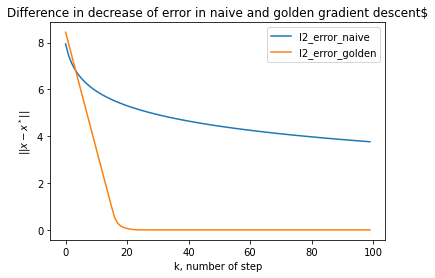

In [208]:
plt.plot(np.arange(100),mas_errors_naive[0:100],label='l2_error_naive')
plt.plot(np.arange(100),mas_errors_golden,label='l2_error_golden')
plt.legend()
plt.title(r'Difference in decrease of error in naive and golden gradient descent$')
plt.xlabel('k, number of step')
plt.ylabel(r'$||x-x^*||$')
plt.show()

# 1e Plot how the distance from the minimum decreases as a function of the number of iterations and empirically determine the convergence rate of the algorithm.

We have already plotted how distance decreases. 

As for convergence rate for golden, we suppose the distance to decrease exponentially, so lets plot dependence of log of error from log of number of step.

In [215]:

plt.loglog(np.arange(100),np.array(mas_errors_golden),label='l2_error_golden')
plt.legend()
plt.title(r'Dependence of error from step number in golden gradient descent$')
plt.xlabel(r'$ k$, number of step')
plt.ylabel(r'$ ||x-x^*||$')
plt.show()

It does not  look like a line, so the dependence is not exponential, but super-exponintial.

## Task 2 - Stochastic gradient descent [40 marks]

Consider the following linear model expressing a noisy relationship between a target variable, $y \in \mathbb{R}$ and a set of predictor variables, $\mathbf{x} \in \mathbb{R}^n$:

$$ y = \mathbf{\alpha}^T \, \mathbf{x} + \xi $$

where $\mathbf{\alpha} \in \mathbb{R}^n$ is a set of parameters and $\xi \sim N(0, \sigma^2)$ is a normal random variable with mean 0 and variance $\sigma^2$ representing the error. We are given a set of $m$ observations

$$Y = \left\{(\mathbf{x}^{(i)},\, y^{(i)})\ : i=1\ldots m \right\}$$

Our task is to find the "best" set of parameters, $\mathbf{\alpha}_*$ given the observations by solving the ordinary least squares problem:

$$\mathbf{\alpha}_* = \min_{\substack{\mathbf{\alpha} \in \mathbb{R}^n} } F(\mathbf{\alpha}\, |\, Y)$$

where

$$ F(\mathbf{\alpha}\, |\, Y) = \frac{1}{2}\, \frac{1}{m} \sum_{i=1}^m\left( y^{(i)} - \mathbf{\alpha}^T\,\mathbf{x}^{(i)}\right)^2$$

Create a test problem with the following specifications (you can of course vary the parameters):

```
n=10
m=100
xmax = 10.0
sigma = 0.25
```

* Solve the problem using the gradient descent code you have written above. Due to the noise, you should not expect to recover the exact "true" value of $\alpha_*$ used to generate the test data but you should be close if the noise is not too large. [15 marks]
* Modify your code to do the optimisation using stochastic gradient descent and compare the results graphically. [15 marks]
* Fix $n=10$ and $m=250$. Compare the performance of your stochastic gradient descent algorithm with different learning rates. Can you find one that performs well? [10 marks]

**Hint:** for both Task 1 and Task 2 you may wish to consult [the provided resources](https://warwick.summon.serialssolutions.com/#!/search/document?ho=t&include.ft.matches=f&fvf=ContentType,Newspaper%20Article,t%7CContentType,Book%20Review,t&l=en-UK&q=Understanding%20Machine%20Learning:%20From%20Theory%20to%20Algorithms&id=FETCHMERGED-warwick_catalog_b279036183) on the module webpage, as well as [nicely explained tutorials](https://realpython.com/gradient-descent-algorithm-python/) on the subject matter. This will help you craft your own code and specialise it for the problems at hand.

Lets denote the amount of samples $N$, the length of one data item $n$, and the matrix of weights $W$.
So we need to fit linear regreassion $\overline y =X\overline\omega$ with loss function 
$Q(\overline \omega)
= \frac{1}{2N} \sum_{i=1}^{N} (X\overline\omega^{(i)} - \overline y^{(i)})^2=
\frac{1}{2N} (X\overline\omega -\overline y)^T (X\overline\omega -\overline y) =
\frac{1}{2N} \overline\omega^T X^T X\overline\omega 
-\overline\omega^T X^T \overline y
-\overline y^TX\overline\omega + \overline y^T \overline y)
$

Hence $\nabla_{\overline\omega} Q(\overline \omega) = 
= \frac{1}{2N} 2 (X^TX\overline\omega-X^T\overline y)=
\frac{1}{N}  (X^T \hat y-X^T\overline y)=
\frac{1}{N}  X^T(\hat y -\overline y)$,
where $\hat y = X\overline\omega$ are the "predicted" be our linear regression model values of $\overline y$


In [358]:
import sklearn 

def Q(W,X_batch,y_batch):
    return 0.5*np.mean((X_batch@W-y_batch)**2,axis=0)

def g_forQ(tau,u,X_batch,y_batch,W):
    return Q(W+tau*u,X_batch,y_batch)


def my_batch_generator(X,y,shuffle=True,batch_size=1):
    if shuffle:
        X,y=sklearn.utils.shuffle(X,y)
    for i in range(0,X.shape[0],batch_size):
        X_batch=X[i:i+batch_size]
        y_batch=y[i:i+batch_size]
        yield (X_batch,y_batch)
        
class MySGDLinearRegression:
    def __init__(self,batch_generator,tau=-0.01,max_epoch=10,use_golden=False):
        self.batch_generator=batch_generator
        self.tau=tau
        self.max_epoch=max_epoch
        self.W=None
        self.errors_log={'iter':[],'loss':[]}
        self.use_golden=use_golden
    def calc_y_hat(self,X):
        y_hat=X@self.W
        return y_hat
    def calc_loss(self,X_batch,y_batch):
        y_hat=self.calc_y_hat(X_batch)
        loss=(y_hat-y_batch)**2
        loss=0.5*np.mean(loss,axis=0)
        return loss
    def calc_loss_grad(self,X_batch,y_batch):
        y_hat=self.calc_y_hat(X_batch)
        loss_grad=X_batch.T@(y_hat-y_batch)/X_batch.shape[0]
        return loss_grad
    def update_weights(self,u,tau_k):
        self.W=self.W+tau_k*u
    def fit(self,X,y,batch_size=1):
        self.W=np.random.randn(X.shape[1]).astype(np.longdouble).reshape((X.shape[1],1))
        for n in range(self.max_epoch):
            new_epoch_generator=self.batch_generator(X,y,batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch=new_batch[0]
                y_batch=new_batch[1]
                batch_grad=self.calc_loss_grad(X_batch,y_batch)
                u=batch_grad/np.linalg.norm(batch_grad)
                #tau_k=0.5*(get_min_by_golden_section_search_1D(-1,1,1e-10,g_hard,u,x,x_star,n,lambd)[-1][0]+get_min_by_golden_section_search_1D(0,1,1e-5,g_hard,u,x,x_star,n,lambd)[-1][1])
                if self.use_golden:
                    tau_k=0.5*(get_min_by_golden_section_search_1D(-1,1,1e-10,g_forQ,u,X_batch,y_batch,self.W)[-1][0]+get_min_by_golden_section_search_1D(0,1,1e-5,g_forQ,u,X_batch,y_batch,self.W)[-1][1])
                    #print("tau_k=",tau_k)
                else:
                    tau_k=self.tau
                self.update_weights(u,tau_k)
                batch_loss=self.calc_loss(X_batch,y_batch)
                self.errors_log['iter'].append(n+batch_num)
                self.errors_log['loss'].append(batch_loss)
                #print("epoch=",n,"batch_num=",batch_num, "batch_loss=",batch_loss)
    def predict(self,X):
        y_hat=X@self.W
        return y_hat

# 2a Solve the problem using the gradient descent code you have written above.

In [362]:
N=100
n=10
sigma=0.25
X=np.random.randn(N,n)
A=np.random.randn(n,1)
EPS=np.random.normal(loc=0.0,scale=sigma,size=(N,1))
y=X@A +EPS


model_golden=MySGDLinearRegression(my_batch_generator,max_epoch=10,use_golden=True)
model_golden.fit(X,y,batch_size=N) #we calc gradient for the whole sample for each of 10 epochs
y_hat=model_golden.predict(X)
print("Final loss golden=",0.5*np.mean((y_hat-y)**2))
mas_epochs_golden=np.array(model_golden.errors_log['iter']).flatten()
mas_errors_golden=np.array(model_golden.errors_log['loss']).flatten()


plt.plot(mas_epochs_golden,mas_errors_golden,label='golden')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Dependence of loss on number of iteration for golden gradient descent')
plt.legend()
plt.show()

Final loss golden= 0.034022891866345174817


# 2b Modify your code to do the optimisation using stochastic gradient descent and compare the results graphically. 

In [ ]:
# Lets put batch_size=1 instead of N

Final loss golden for batch_size= 100  is  3.7357639771424481728
Final loss golden for batch_size= 50  is  0.063034593800882221994
Final loss golden for batch_size= 1  is  0.046236678150543991764


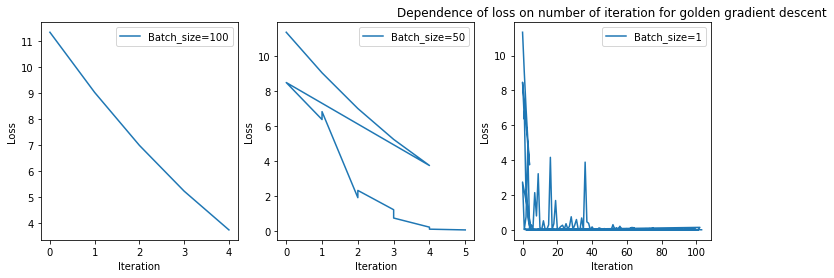

In [382]:
model_golden=MySGDLinearRegression(my_batch_generator,max_epoch=5,use_golden=True)

fig,ax=plt.subplots(1,3)
fig.set_figheight(4)
fig.set_figwidth(12)
for i,bs in enumerate([N,N//2,N//100]): #set different batch_sizes
    model_golden.fit(X,y,batch_size=bs) #we calc gradient for the whole sample for each of 10 epochs
    y_hat=model_golden.predict(X)
    print("Final loss golden for batch_size=", bs ,' is ', 0.5*np.mean((y_hat-y)**2))
    mas_epochs_golden=np.array(model_golden.errors_log['iter']).flatten()
    mas_errors_golden=np.array(model_golden.errors_log['loss']).flatten()
    ax[i].plot(mas_epochs_golden,mas_errors_golden,label='Batch_size='+str(bs))
    ax[i].set_xlabel('Iteration')
    ax[i].set_ylabel('Loss')
    ax[i].legend()

#plt.xlabel('iteration')
#plt.ylabel('Loss')
plt.title('Dependence of loss on number of iteration for golden gradient descent')
plt.legend()
plt.show()

So we see that if we use big batch_size, then the loss after each batch decreases monotonically, 
and when we use small batch_size, then we have the advantage that we do not need to store the whole sample in memory,
but we pay for it that inside one epoch the loss is very volatile-
but after each finiched epoch the loss compared to loss after previous completed epoch decreases also momotonically because due to Law of Large numbers on averge via the epoch we move into the direction of true gradient (even if we are using mini-batch gradient descent)

# 2c Fix  𝑛=10  and  𝑚=250 . Compare the performance of your stochastic gradient descent algorithm with different learning rates. Can you find one that performs well? 

In [394]:
from tqdm import tqdm 

N=250
n=10
sigma=0.25
X=np.random.randn(N,n)
A=np.random.randn(n,1)
EPS=np.random.normal(loc=0.0,scale=sigma,size=(N,1))
y=X@A +EPS

mas_tau=[t for t in np.linspace(-1,1,100)]
mas_err_tau=[]
best_loss=np.infty
best_tau=mas_tau[0]

for i,tau in tqdm(enumerate(mas_tau)): #set different batch_sizes
    model_golden=MySGDLinearRegression(my_batch_generator,max_epoch=5,use_golden=True, tau=tau)
    model_golden.fit(X,y,batch_size=N)
    y_hat=model_golden.predict(X)
    tek_loss=0.5*np.mean((y_hat-y)**2)
    #print("Final loss golden for tau=", tau ,' is ', tek_loss)
    mas_err_tau.append(tek_loss)
    if tek_loss <best_loss:
        best_loss=tek_loss
        best_tau=tau

print("Best_loss=",best_loss, "best_tau=",best_tau)
plt.plot(mas_tau, mas_err_tau,label='Finall_loss')
plt.xlabel(r'$\tau$')
plt.ylabel('Final Loss')
plt.title('Dependence of loss on number of iteration for golden gradient descent')
plt.legend()
plt.show()

100it [01:20,  1.24it/s]

Best_loss= 0.81020788992145797834 best_tau= 0.31313131313131315


We see that best loss is for $\tau=0.31$